In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '91e2373f-8b1c-4688-a475-59f3ae047875',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.json_normalize(data['data'])

#Adding a timestamp at the end of our df to make sure when the data is gathered, whether the loops work properly, etc.

df['timestamp'] = pd.to_datetime('now')
df

In [ ]:
#In order to automate we want to create a function that retrieves this data and appends it to our df
#Then we create a loop that calls the function with the frequency we choose

def API_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '91e2373f-8b1c-4688-a475-59f3ae047875',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#Once you pull the data you can: keep it in a df and work with it:
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])

#Or send it to a csv file to work with that file:

    if not os.path.isfile(r'C:\Users\Herenya\Desktop\Road to Data Analyst\DataAnalystBootcampATA\Python\Crypto_API.csv'):
            df.to_csv(r'C:\Users\Herenya\Desktop\Road to Data Analyst\DataAnalystBootcampATA\Python\Crypto_API.csv', header='column_names')
    else:
            df2.to_csv(r'C:\Users\Herenya\Desktop\Road to Data Analyst\DataAnalystBootcampATA\Python\Crypto_API.csv', mode='a', header=False)
    

In [ ]:
import os
from time import time
from time import sleep

#we have a max of about 300 pulls per day in this api, I'm using a lower number just to make sure I don't pass the limit

for i in range(100):
    API_runner()
    print('API Runner completed')
    sleep(60) #sleep -wait- 1 minute before running again
exit()

In [ ]:
#Checking the data is actually there:
#In the DF

df

#In the csv file

pd.read_csv(r'C:\Users\Herenya\Desktop\Road to Data Analyst\DataAnalystBootcampATA\Python\Crypto_API.csv')

In [47]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#changing the scientific annotation system

In [57]:
#Exploratory analysis
#Mean price of the data we collected and mean changes in price over certain periods of time - would need to collect data over larger periods of time for
#it to be relevant

df3= df.groupby('name', sort = False)[['quote.USD.price','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_90d']].mean()

df3

,quote.USD.price,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,61247.10127,-4.75802,-6.58786,-11.46940,-13.71151
Ethereum,3325.32792,-4.95611,-5.50006,-10.91544,-8.78085
Tether USDt,0.99962,0.02271,0.03864,-0.03763,-0.03136
BNB,568.06449,-3.60957,-4.95158,-5.74990,-4.26452
Solana,128.13275,-4.39397,-10.54918,-23.94179,-34.22490
USDC,1.00002,0.00809,0.00283,-0.00512,0.00885
XRP,0.47719,-1.75209,-5.04212,-11.08302,-25.91243
Toncoin,7.37545,-4.26272,-5.10340,15.00786,41.45101
Dogecoin,0.11803,-5.23086,-11.97599,-29.35436,-36.09150


In [155]:
df_percentage_only = df.groupby('name', sort = False)[['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_90d']].mean()

df_percentage_only.rename(columns={'level_1': 'percent_change','quote.USD.percent_change_24h': 'PC_24h','quote.USD.percent_change_7d' : 'PC_7d' , 'quote.USD.percent_change_30d':'PC_30d', 'quote.USD.percent_change_90d':'PC_90d'}, inplace= True)

df_percentage_only

,PC_24h,PC_7d,PC_30d,PC_90d
name,,,,
Bitcoin,-4.75802,-6.58786,-11.46940,-13.71151
Ethereum,-4.95611,-5.50006,-10.91544,-8.78085
Tether USDt,0.02271,0.03864,-0.03763,-0.03136
BNB,-3.60957,-4.95158,-5.74990,-4.26452
Solana,-4.39397,-10.54918,-23.94179,-34.22490
USDC,0.00809,0.00283,-0.00512,0.00885
XRP,-1.75209,-5.04212,-11.08302,-25.91243
Toncoin,-4.26272,-5.10340,15.00786,41.45101
Dogecoin,-5.23086,-11.97599,-29.35436,-36.09150


In [157]:
#The above df is not useful for visualization purposes, in order to fix it we use the stack funct.:

df4 = df_percentage_only.stack()

df4

name               
Bitcoin      PC_24h    -4.75802
             PC_7d     -6.58786
             PC_30d   -11.46940
             PC_90d   -13.71151
Ethereum     PC_24h    -4.95611
             PC_7d     -5.50006
             PC_30d   -10.91544
             PC_90d    -8.78085
Tether USDt  PC_24h     0.02271
             PC_7d      0.03864
             PC_30d    -0.03763
             PC_90d    -0.03136
BNB          PC_24h    -3.60957
             PC_7d     -4.95158
             PC_30d    -5.74990
             PC_90d    -4.26452
Solana       PC_24h    -4.39397
             PC_7d    -10.54918
             PC_30d   -23.94179
             PC_90d   -34.22490
USDC         PC_24h     0.00809
             PC_7d      0.00283
             PC_30d    -0.00512
             PC_90d     0.00885
XRP          PC_24h    -1.75209
             PC_7d     -5.04212
             PC_30d   -11.08302
             PC_90d   -25.91243
Toncoin      PC_24h    -4.26272
             PC_7d     -5.10340
             PC_30d 

In [161]:
type(df4)

pandas.core.series.Series

In [181]:
#Stack sirved its purpose of turning the percentages also into rows but now we have a Series and we need a DF so we convert it:

df5 = df4.to_frame(name='values')

df5

values
name                        
Bitcoin     PC_24h  -4.75802
            PC_7d   -6.58786
            PC_30d -11.46940
            PC_90d -13.71151
Ethereum    PC_24h  -4.95611
            PC_7d   -5.50006
            PC_30d -10.91544
            PC_90d  -8.78085
Tether USDt PC_24h   0.02271
            PC_7d    0.03864
            PC_30d  -0.03763
            PC_90d  -0.03136
BNB         PC_24h  -3.60957
            PC_7d   -4.95158
            PC_30d  -5.74990
            PC_90d  -4.26452
Solana      PC_24h  -4.39397
            PC_7d  -10.54918
            PC_30d -23.94179
            PC_90d -34.22490
USDC        PC_24h   0.00809
            PC_7d    0.00283
            PC_30d  -0.00512
            PC_90d   0.00885
XRP         PC_24h  -1.75209
            PC_7d   -5.04212
            PC_30d -11.08302
            PC_90d -25.91243
Toncoin     PC_24h  -4.26272
            PC_7d   -5.10340
            PC_30d  15.00786
            PC_90d  41.45101
Dogecoin    PC_24h  -5.23086
            PC_7d  -11.97599
            PC_30d -29.35436
            PC_90d -36.09150
Cardano     PC_24h  -3.21203
            PC_7d   -7.18770
            PC_30d -18.73382
            PC_90d -44.54468
TRON        PC_24h  -0.44607
            PC_7d    2.51718
            PC_30d   5.22738
            PC_90d  -1.96130
Shiba Inu   PC_24h  -6.34689
            PC_7d  -15.06220
            PC_30d -32.07794
            PC_90d -45.63030
Avalanche   PC_24h  -1.55460
            PC_7d  -13.07785
            PC_30d -34.87955
            PC_90d -57.11097
Polkadot    PC_24h  -2.38067
            PC_7d   -9.02213
            PC_30d -22.90881
            PC_90d -43.35682
Chainlink   PC_24h  -1.85304
            PC_7d   -6.86657
            PC_30d -22.08221
            PC_90d -35.72208

In [211]:
#Now we need an index so we are going to reset the index and it will create an int index as default

df6 = df5.reset_index()

df6


,name,level_1,values
0,Bitcoin,PC_24h,-4.75802
1,Bitcoin,PC_7d,-6.58786
2,Bitcoin,PC_30d,-11.46940
3,Bitcoin,PC_90d,-13.71151
4,Ethereum,PC_24h,-4.95611
5,Ethereum,PC_7d,-5.50006
6,Ethereum,PC_30d,-10.91544
7,Ethereum,PC_90d,-8.78085
8,Tether USDt,PC_24h,0.02271
9,Tether USDt,PC_7d,0.03864


In [219]:
df6 = df6.rename(columns={'level_1' : 'percentage_change'})

df6

,name,percentage_change,values
0,Bitcoin,PC_24h,-4.75802
1,Bitcoin,PC_7d,-6.58786
2,Bitcoin,PC_30d,-11.46940
3,Bitcoin,PC_90d,-13.71151
4,Ethereum,PC_24h,-4.95611
5,Ethereum,PC_7d,-5.50006
6,Ethereum,PC_30d,-10.91544
7,Ethereum,PC_90d,-8.78085
8,Tether USDt,PC_24h,0.02271
9,Tether USDt,PC_7d,0.03864


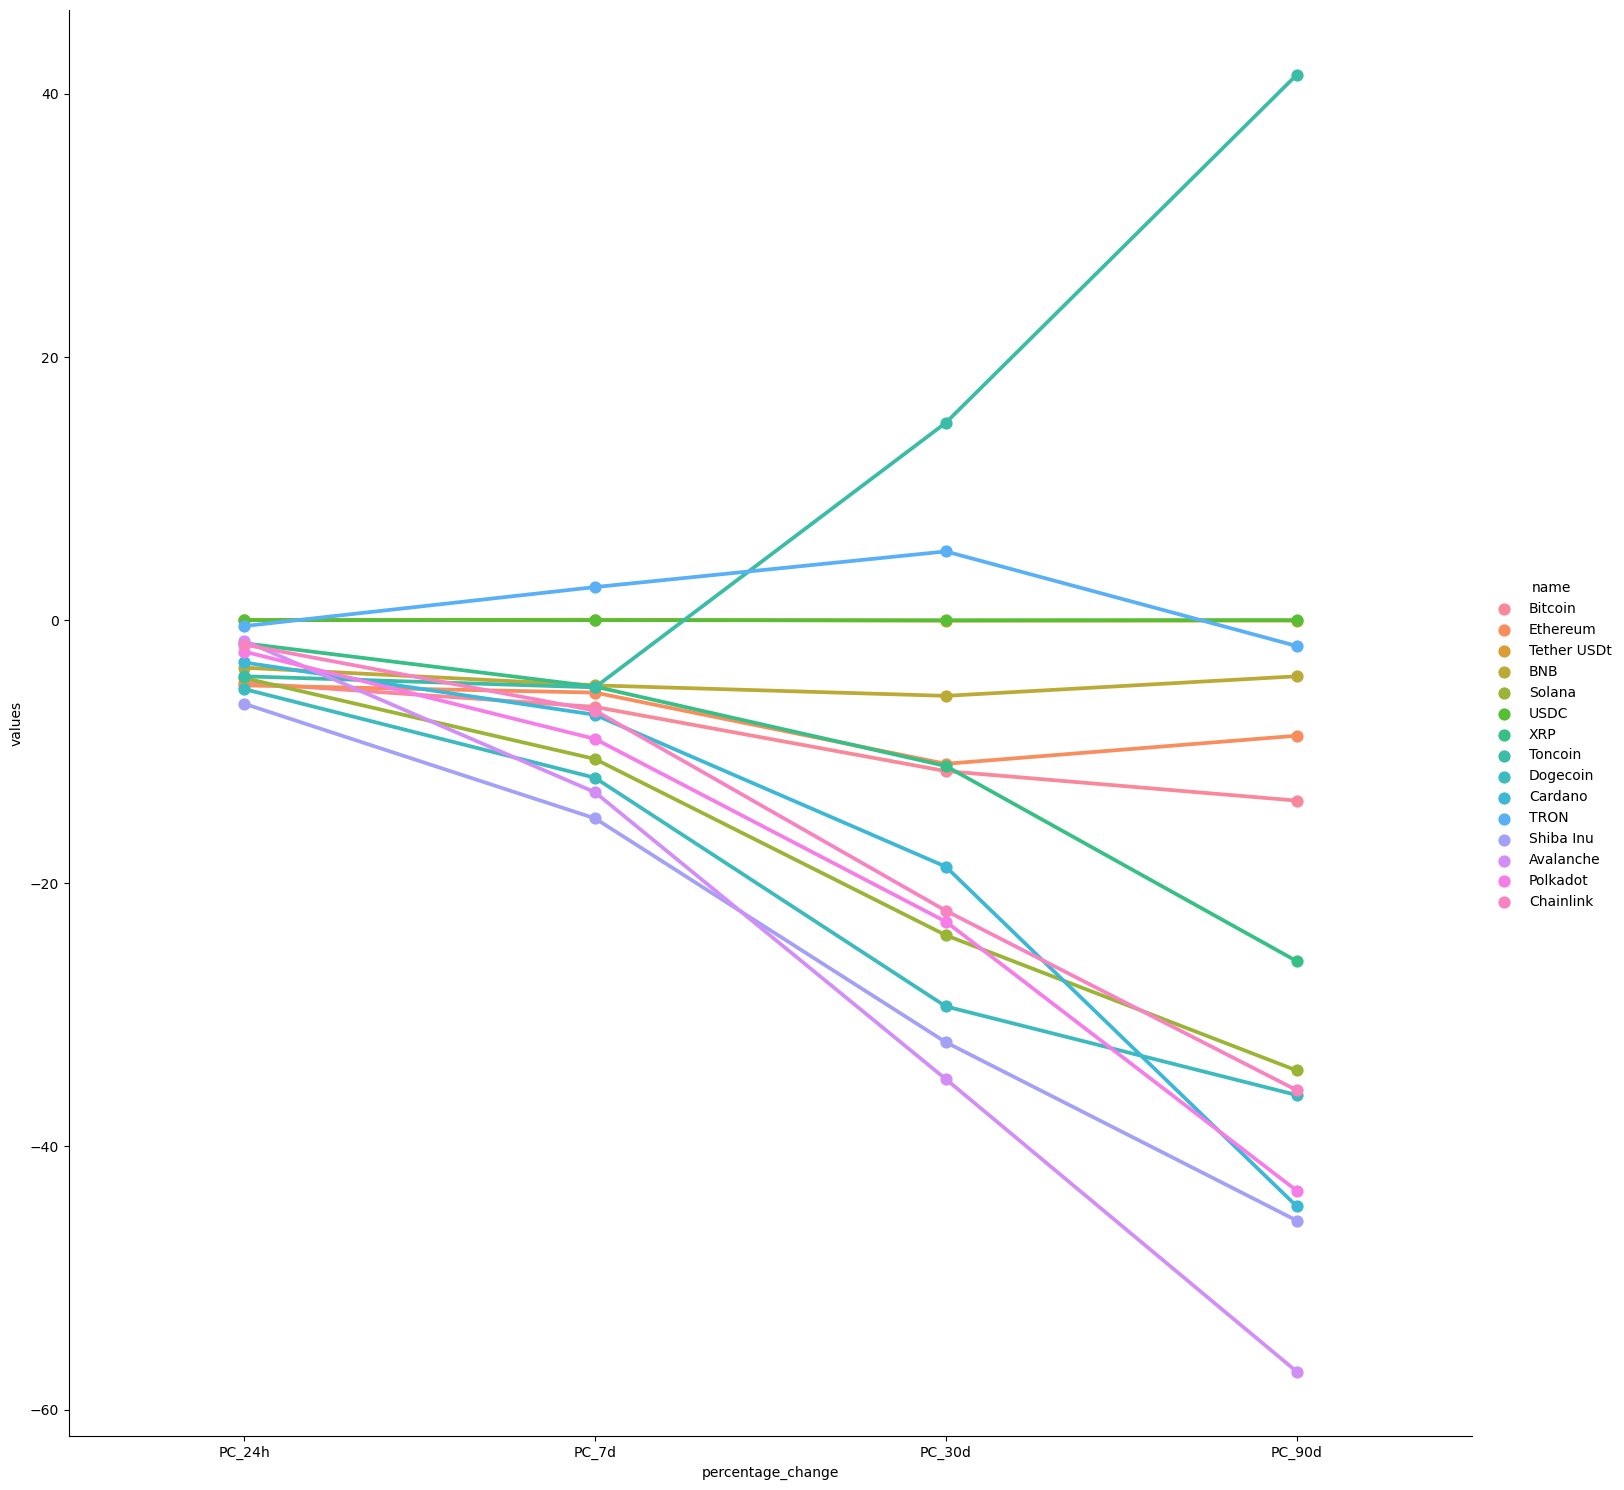

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percentage_change', y='values', hue='name', data=df6, kind='point', height = 15)

In [231]:
#Now let's visualize just one coin over time (we should gather data over a longer period)

df7 = df[['name','quote.USD.price','timestamp']]
df7 = df7.query("name == 'Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,61236.43342,2024-06-24 14:34:42.290865
0,Bitcoin,61250.46611,2024-06-24 14:35:36.969593
0,Bitcoin,61257.51240,2024-06-24 14:36:37.568345
0,Bitcoin,61258.14932,2024-06-24 14:37:38.094688
0,Bitcoin,61258.14932,2024-06-24 14:38:38.601561
0,Bitcoin,61221.89707,2024-06-24 14:39:39.199576


C:\Users\Herenya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Herenya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

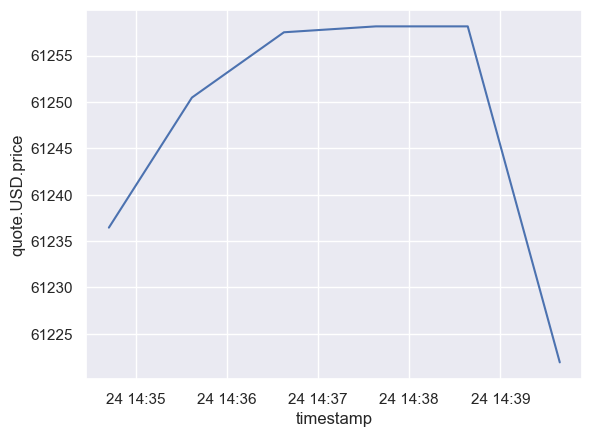

In [233]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df7)